In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [3]:
len(filenames)

44441

In [4]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.build(input_shape=(None, 224, 224, 3))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [6]:
img = image.load_img('1.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.0034222 , 0.01165891, 0.00049219, ..., 0.        , 0.01624614,
       0.02747294], dtype=float32)

In [7]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [8]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([0.        , 0.01761626, 0.001716  , ..., 0.01247231, 0.02726394,
       0.06899249], dtype=float32)

In [ ]:
chunk_size = 1000
total_files = len(filenames)


for i in range(0, total_files, chunk_size):
    chunk_filenames = filenames[i:i + chunk_size]
    image_features = []

    for file in chunk_filenames:
        features = extract_features_from_images(file, model)
        image_features.append(features)

 
    image_features_array = np.array(image_features)


    chunk_file_name = f'Image_features_chunk_{i // chunk_size}.pkl'
    with open(chunk_file_name, 'wb') as f:
        pkl.dump(image_features_array, f)
    
    print(f'Saved chunk {i // chunk_size + 1}/{(total_files // chunk_size) + 1}')

all_features = []
for i in range(0, total_files, chunk_size):
    chunk_file_name = f'Image_features_chunk_{i // chunk_size}.pkl'
    with open(chunk_file_name, 'rb') as f:
        chunk_features = pkl.load(f)
        all_features.append(chunk_features)

all_features_array = np.vstack(all_features)

print(all_features_array.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━

In [11]:
all_features_array = pkl.dump(all_features_array, open('all_features_array.pkl','wb'))

In [12]:
chunk_filenames = pkl.dump(chunk_filenames, open('chunk_filenames.pkl','wb'))

In [15]:
all_features_array = pkl.load(open('all_features_array.pkl','rb'))

In [16]:
chunk_filenames = pkl.load(open('chunk_filenames.pkl','rb'))

In [17]:
np.array(all_features_array).shape

(44441, 2048)

In [18]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [19]:
neighbors.fit(all_features_array)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [20]:
input_image = extract_features_from_images('1.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [21]:
distance,indices = neighbors.kneighbors([input_image])

In [22]:
indices[0]

array([17096, 18742, 22917, 16991, 17025, 18363], dtype=int64)

In [23]:
from IPython.display import Image

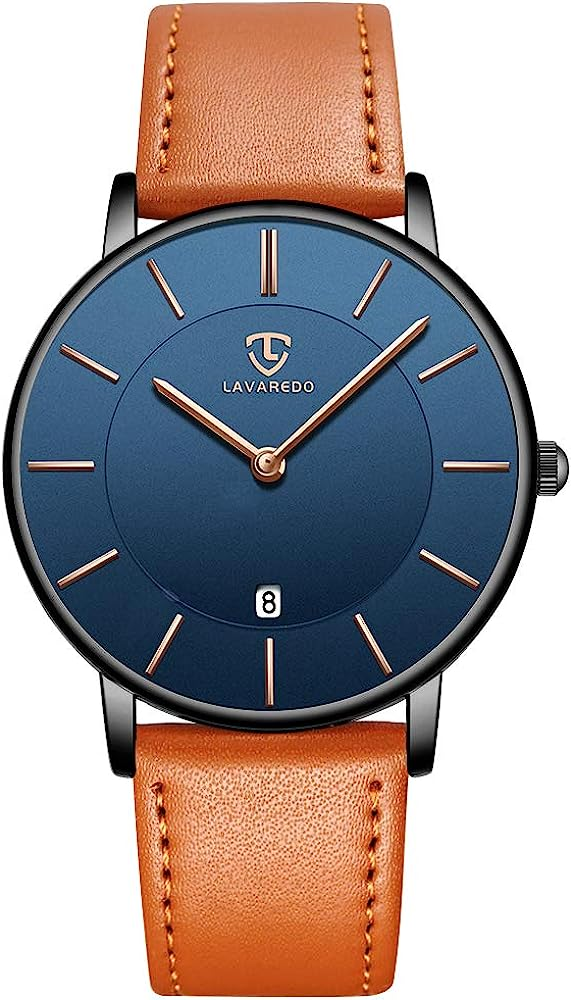

In [24]:
Image('1.jpg')

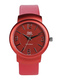

In [25]:
Image(filenames[indices[0][1]])

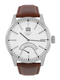

In [26]:
Image(filenames[indices[0][2]])

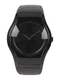

In [27]:
Image(filenames[indices[0][3]])

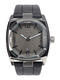

In [28]:
Image(filenames[indices[0][4]])

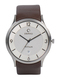

In [29]:
Image(filenames[indices[0][5]])